In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

# Importing Dataset

In [3]:
inp0= pd.read_csv("./HappinessAlcoholConsumption.csv")
inp0.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


# Disclamier
#### Column GDP_PerCapita in above dataset is incorrect. 
#### So we will be replacing that column with another dataset's colun GDP

In [4]:
gdp= pd.read_csv("./GDP.csv",usecols=['Country', "2018"])
gdp.head()

,Country,2018
0,Aruba,NaN
1,Afghanistan,1955.006208
2,Angola,6452.355165
3,Albania,13364.155400
4,Arab World,17570.137600


In [5]:
inp1=pd.merge(inp0,gdp,how='left')

In [6]:
inp1.drop('GDP_PerCapita',axis=1,inplace= True)
inp1.rename(columns={'2018': "GDP_PerCapita"},inplace=True)
inp1.head()

,Country,Region,Hemisphere,HappinessScore,HDI,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,GDP_PerCapita
0,Denmark,Western Europe,north,7.526,928,224,81,278,55671.16527
1,Switzerland,Western Europe,north,7.509,943,185,100,280,68060.94105
2,Iceland,Western Europe,north,7.501,933,233,61,78,57303.06078
3,Norway,Western Europe,north,7.498,951,169,71,129,65510.58527
4,Finland,Western Europe,north,7.413,918,263,133,97,48416.93603


# Cleaning Dataset

### Looking for null values

In [7]:
inp1.isnull().sum()

Country             0
Region              0
Hemisphere          0
HappinessScore      0
HDI                 0
Beer_PerCapita      0
Spirit_PerCapita    0
Wine_PerCapita      0
GDP_PerCapita       3
dtype: int64

####  We have a few null values

In [8]:
inp1[inp1['GDP_PerCapita'].isna()]

,Country,Region,Hemisphere,HappinessScore,HDI,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,GDP_PerCapita
38,Venezuela,Latin America and Caribbean,north,6.084,766,333,100,3,NaN
39,Slovakia,Central and Eastern Europe,north,6.078,853,196,293,116,NaN
121,Syria,Middle East and Northern Africa,north,3.069,536,5,35,16,NaN


#### According to google 
##### Venezuela=3534
##### Slovakia= 19389.98
##### Syria= 1265.61

In [9]:
inp1.loc[inp1.Country== 'Venezuela',"GDP_PerCapita"]= 3534
inp1.loc[inp1.Country== 'Slovakia',"GDP_PerCapita"]= 19389.98
inp1.loc[inp1.Country== 'Syria',"GDP_PerCapita"]= 1265.61
inp1.isnull().sum()

Country             0
Region              0
Hemisphere          0
HappinessScore      0
HDI                 0
Beer_PerCapita      0
Spirit_PerCapita    0
Wine_PerCapita      0
GDP_PerCapita       0
dtype: int64

### Looking for any logically null/improper value (like -1)

In [10]:
inp1.describe()

,HappinessScore,HDI,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,GDP_PerCapita
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,5.524828,740.877049,137.565574,96.598361,66.598361,24430.952753
std,1.148736,149.846124,104.817353,81.435028,88.121503,23622.095085
min,3.069000,351.000000,1.000000,1.000000,1.000000,932.172007
25%,4.528250,663.750000,38.250000,25.500000,5.000000,7315.685023
50%,5.542000,757.500000,125.500000,82.500000,16.000000,17709.640335
75%,6.477000,861.500000,224.750000,142.500000,112.750000,37530.032610
max,7.526000,951.000000,376.000000,373.000000,370.000000,126898.425900


#### Dataset is clean but might have some outliers

# Looking for outliers

### in GDP_PerCapita

<AxesSubplot:xlabel='GDP_PerCapita'>

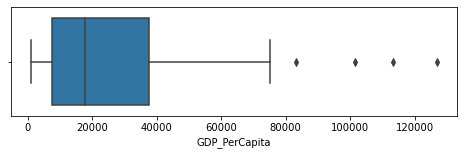

In [11]:
plt.figure(figsize=[8,2])
sns.boxplot(inp1.GDP_PerCapita)

In [12]:
inp1.GDP_PerCapita.quantile([.5,.75,.9,.95,.99])

0.50     17709.640335
0.75     37530.032610
0.90     53195.449936
0.95     65374.785289
0.99    110858.204537
Name: GDP_PerCapita, dtype: float64

In [13]:
inp1[inp1.GDP_PerCapita>66530]

,Country,Region,Hemisphere,HappinessScore,HDI,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,GDP_PerCapita
1,Switzerland,Western Europe,north,7.509,943,185,100,280,68060.94105
17,Ireland,Western Europe,north,6.907,934,313,118,165,83203.39468
18,Luxembourg,Western Europe,north,6.871,904,236,133,271,113337.42050
20,Singapore,Southeastern Asia,north,6.739,930,60,12,11,101531.63020
26,United Arab Emirates,Middle East and Northern Africa,north,6.573,862,16,135,5,75075.25741
32,Qatar,Middle East and Northern Africa,north,6.375,855,1,42,7,126898.42590


#### As all of these countries' data is important, we cant ruleout them.
#### To avoid further issues we will work mostly on persentiles and medians

# Univariate Analysis

### Region

In [14]:
inp1.Region.value_counts()

Sub-Saharan Africa                 28
Central and Eastern Europe         27
Latin America and Caribbean        23
Western Europe                     20
Middle East and Northern Africa    11
Southeastern Asia                   5
Eastern Asia                        4
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

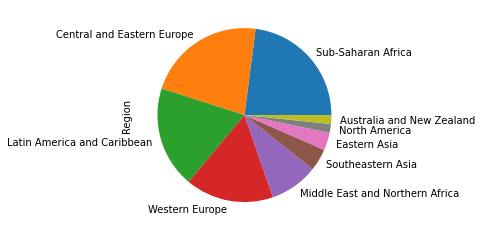

In [15]:
inp1.Region.value_counts().plot.pie()
plt.show()

### Hemisphere

In [16]:
inp1.Hemisphere.value_counts()

north    92
south    21
both      5
noth      4
Name: Hemisphere, dtype: int64

#### Fixing values

In [17]:
inp1[inp1.Hemisphere=="noth"]

,Country,Region,Hemisphere,HappinessScore,HDI,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,GDP_PerCapita
46,Japan,Eastern Asia,noth,5.921,907,77,202,16,42797.45852
51,South Korea,Eastern Asia,noth,5.835,900,140,16,9,40111.77576
70,China,Eastern Asia,noth,5.245,748,79,192,8,18236.61298
84,Mongolia,Eastern Asia,noth,4.907,743,77,189,8,13799.90485


In [18]:
inp1.loc[inp1.Hemisphere=="noth",'Hemisphere']="north"
inp1.Hemisphere.value_counts()

north    96
south    21
both      5
Name: Hemisphere, dtype: int64

<AxesSubplot:ylabel='Hemisphere'>

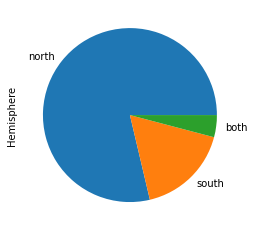

In [19]:
inp1.Hemisphere.value_counts().plot.pie()

### Happiness Score

In [20]:
inp1.HappinessScore.describe()

count    122.000000
mean       5.524828
std        1.148736
min        3.069000
25%        4.528250
50%        5.542000
75%        6.477000
max        7.526000
Name: HappinessScore, dtype: float64

<AxesSubplot:xlabel='HappinessScore'>

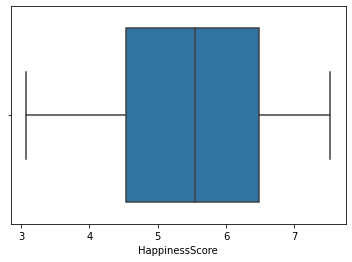

In [21]:
sns.boxplot(x=inp1["HappinessScore"])

In [22]:
inp1[inp1.HappinessScore>7.5][['Country','HappinessScore']].sort_values(by=['HappinessScore'],ascending=False)

,Country,HappinessScore
0,Denmark,7.526
1,Switzerland,7.509
2,Iceland,7.501


#### These are the happiest countries

In [23]:
inp1[inp1.HappinessScore<3.5][['Country','HappinessScore']].sort_values(by=['HappinessScore'])

,Country,HappinessScore
121,Syria,3.069
120,Togo,3.303
119,Benin,3.484


##### These Countries have the lowest of Happiness Score
##### We can see all the countries are from african continent

### HDI (Human Development Index)

In [24]:
inp1.HDI.describe()

count    122.000000
mean     740.877049
std      149.846124
min      351.000000
25%      663.750000
50%      757.500000
75%      861.500000
max      951.000000
Name: HDI, dtype: float64

<AxesSubplot:xlabel='HDI'>

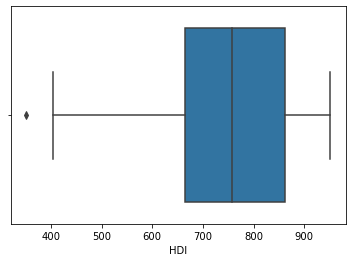

In [25]:
sns.boxplot(x=inp1["HDI"])

In [26]:
inp1[inp1.HDI>930][['Country','HDI']].sort_values(by=['HDI'],ascending=False)

,Country,HDI
3,Norway,951
1,Switzerland,943
8,Australia,938
14,Germany,934
17,Ireland,934
2,Iceland,933
9,Sweden,932


##### These countries have heighest human development index

In [27]:
inp1[inp1.HDI<400][['Country','HDI']].sort_values(by=['HDI'],ascending=False)

,Country,HDI
113,Niger,351


##### Niger has the lowest human development index

## Beer Spirit and Wine per capita

In [28]:
inp1.Beer_PerCapita.describe()

count    122.000000
mean     137.565574
std      104.817353
min        1.000000
25%       38.250000
50%      125.500000
75%      224.750000
max      376.000000
Name: Beer_PerCapita, dtype: float64

In [29]:
inp1.Spirit_PerCapita.describe()

count    122.000000
mean      96.598361
std       81.435028
min        1.000000
25%       25.500000
50%       82.500000
75%      142.500000
max      373.000000
Name: Spirit_PerCapita, dtype: float64

In [30]:
inp1.Wine_PerCapita.describe()

count    122.000000
mean      66.598361
std       88.121503
min        1.000000
25%        5.000000
50%       16.000000
75%      112.750000
max      370.000000
Name: Wine_PerCapita, dtype: float64

In [31]:
inp1.loc[(inp1.Beer_PerCapita<7) & (inp1.Spirit_PerCapita<7) & (inp1.Wine_PerCapita<7)]\
[['Country','Beer_PerCapita','Spirit_PerCapita','Wine_PerCapita']]


,Country,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
93,Egypt,6,4,1
106,Mali,5,1,1
109,Comoros,1,3,1
113,Niger,3,2,1


#### These countries consume lease amount of these beverages

In [32]:
inp1.loc[(inp1.Beer_PerCapita>350) | (inp1.Spirit_PerCapita>350) | (inp1.Wine_PerCapita>350)]\
[['Country','Beer_PerCapita','Spirit_PerCapita','Wine_PerCapita']]

,Country,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
25,Czech Republic,361,170,134
30,France,127,151,370
54,Belarus,142,373,42
90,Namibia,376,3,1


#### These countries consumes heighest amout of these beverages

## GDP_PerCapita

In [33]:
inp1.GDP_PerCapita.describe()

count       122.000000
mean      24430.952753
std       23622.095085
min         932.172007
25%        7315.685023
50%       17709.640335
75%       37530.032610
max      126898.425900
Name: GDP_PerCapita, dtype: float64

<AxesSubplot:xlabel='GDP_PerCapita'>

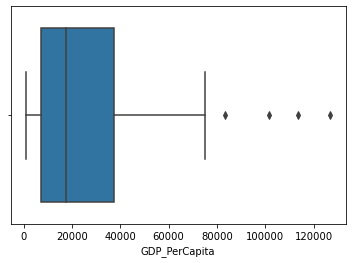

In [34]:
sns.boxplot(inp1.GDP_PerCapita)

In [35]:
inp1.loc[inp1.GDP_PerCapita>80000][['Country','GDP_PerCapita']].sort_values(by=['GDP_PerCapita'],ascending=False)

,Country,GDP_PerCapita
32,Qatar,126898.42590
18,Luxembourg,113337.42050
20,Singapore,101531.63020
17,Ireland,83203.39468


#### These Countries have heighest GDP per Capita

In [36]:
inp1.loc[inp1.GDP_PerCapita<1500][['Country','GDP_PerCapita']].sort_values(by=['GDP_PerCapita'],ascending=False)

,Country,GDP_PerCapita
104,Malawi,1310.995555
118,Liberia,1308.629536
121,Syria,1265.610000
113,Niger,1063.421841
98,Dem. Rep. Congo,932.172007


#### These Countries have lowest GDP per Capita

## Alcohol consumption

Lets add a column "Alcohol" that will simplify our question
-> Alcohol = (Beer + Spirit + Wine)

In [37]:
inp1['Alcohol']= (inp1.Beer_PerCapita + inp1.Spirit_PerCapita + inp1.Wine_PerCapita)
inp1.head()

,Country,Region,Hemisphere,HappinessScore,HDI,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,GDP_PerCapita,Alcohol
0,Denmark,Western Europe,north,7.526,928,224,81,278,55671.16527,583
1,Switzerland,Western Europe,north,7.509,943,185,100,280,68060.94105,565
2,Iceland,Western Europe,north,7.501,933,233,61,78,57303.06078,372
3,Norway,Western Europe,north,7.498,951,169,71,129,65510.58527,369
4,Finland,Western Europe,north,7.413,918,263,133,97,48416.93603,493


In [38]:
inp1.sort_values(['Alcohol'],ascending=False).head()

,Country,Region,Hemisphere,HappinessScore,HDI,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,GDP_PerCapita,Alcohol
25,Czech Republic,Central and Eastern Europe,north,6.596,885,361,170,134,39743.59709,665
30,France,Western Europe,north,6.478,899,127,151,370,45342.39574,648
49,Russian Federation,Central and Eastern Europe,north,5.856,815,247,326,73,27588.12544,646
53,Lithuania,Central and Eastern Europe,north,5.813,855,343,244,56,35461.35910,643
18,Luxembourg,Western Europe,north,6.871,904,236,133,271,113337.42050,640


#### These countries drink the most

In [39]:
inp1.sort_values(['Alcohol']).head()

,Country,Region,Hemisphere,HappinessScore,HDI,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,GDP_PerCapita,Alcohol
109,Comoros,Sub-Saharan Africa,south,3.956,502,1,3,1,2913.387306,5
113,Niger,Sub-Saharan Africa,north,3.856,351,3,2,1,1063.421841,6
106,Mali,Sub-Saharan Africa,north,4.073,421,5,1,1,2316.655200,7
93,Egypt,Middle East and Northern Africa,north,4.362,694,6,4,1,12412.309400,11
114,Chad,Sub-Saharan Africa,north,3.763,405,15,1,1,1968.258262,17


## Happiness Score into categorical type

In [40]:
inp1.HappinessScore.describe()

count    122.000000
mean       5.524828
std        1.148736
min        3.069000
25%        4.528250
50%        5.542000
75%        6.477000
max        7.526000
Name: HappinessScore, dtype: float64

<AxesSubplot:ylabel='HappinessCat'>

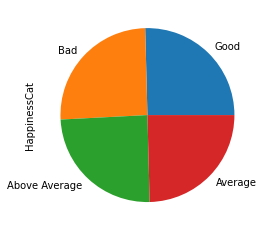

In [41]:
def fun(x):
    if x< 4.528250:
        return "Bad"
    elif x> 4.528250 and x< 5.542000:
        return "Average"
    elif x>5.542000 and x< 6.477000:
        return "Above Average"
    else:
        return "Good"
inp1['HappinessCat']=inp1.HappinessScore.apply(lambda x:fun(x))
inp1.HappinessCat.value_counts().plot.pie()


# Bivariate Analysis

#### Happiness VS HDI

<AxesSubplot:xlabel='HDI', ylabel='HappinessCat'>

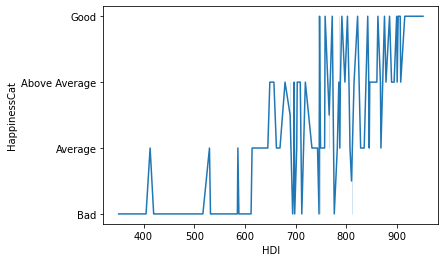

In [42]:
sns.lineplot(inp1.HDI,inp1.HappinessCat)

<AxesSubplot:xlabel='HDI', ylabel='HappinessCat'>

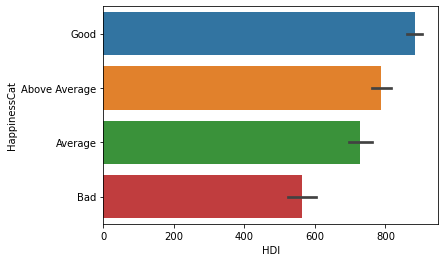

In [43]:
sns.barplot(inp1.HDI,inp1.HappinessCat)

#### This graph somewhat tells developed countries are mostly happy

#### HDI VS Alcohol

<AxesSubplot:xlabel='HDI', ylabel='Alcohol'>

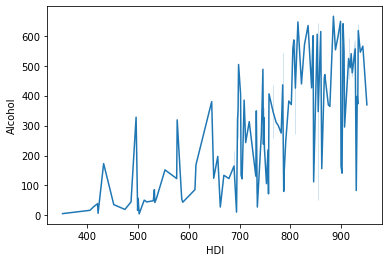

In [44]:
sns.lineplot(inp1.HDI,inp1.Alcohol)

<AxesSubplot:xlabel='HDI', ylabel='Alcohol'>

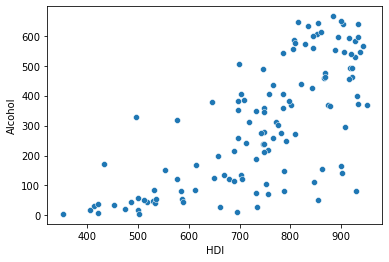

In [45]:
sns.scatterplot(inp1.HDI,inp1.Alcohol)

#### Not much is clear here, but we can see, developed countries consumes more alcohol than underdeveloped ones

#### Happiness vs Alcohol

<AxesSubplot:xlabel='HappinessCat', ylabel='Alcohol'>

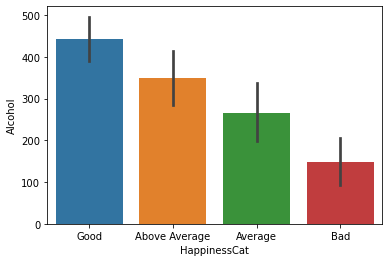

In [46]:
sns.barplot(inp1.HappinessCat,inp1.Alcohol)

<AxesSubplot:xlabel='HappinessCat', ylabel='Alcohol'>

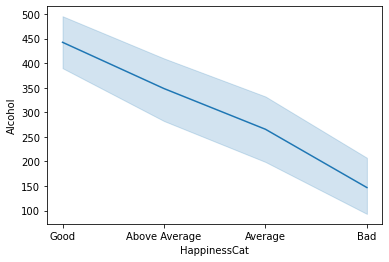

In [47]:
sns.lineplot(inp1.HappinessCat,inp1.Alcohol)

#### Here we are getting a bit of hint that happiest countries usually consumes more alcohol 

### GDP vs Happiness

<AxesSubplot:xlabel='GDP_PerCapita', ylabel='HappinessCat'>

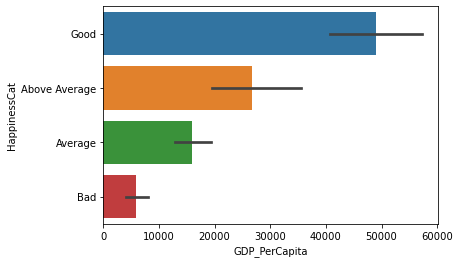

In [48]:
sns.barplot(inp1.GDP_PerCapita,inp1.HappinessCat)

<AxesSubplot:xlabel='GDP_PerCapita', ylabel='HappinessCat'>

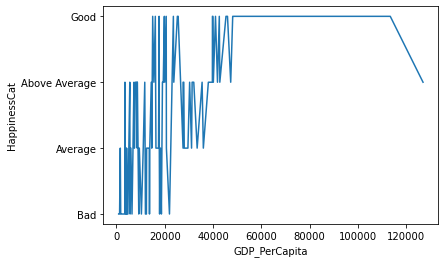

In [49]:
sns.lineplot(inp1.GDP_PerCapita,inp1.HappinessCat)

#### Better GDP per capita means happier people, happier nation.

#### Happiness, HDI and Alcohol

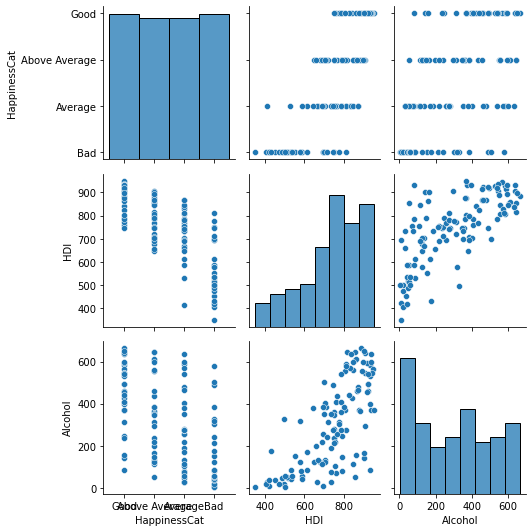

In [50]:
sns.pairplot(vars=['HappinessCat','HDI','Alcohol'] , data=inp1)
plt.tight_layout()

# Statistical Intuition

#### Mean of whole data

In [51]:
inp1.mean()

HappinessScore          5.524828
HDI                   740.877049
Beer_PerCapita        137.565574
Spirit_PerCapita       96.598361
Wine_PerCapita         66.598361
GDP_PerCapita       24430.952753
Alcohol               300.762295
dtype: float64

#### Median of whole data

In [52]:
inp1.median()

HappinessScore          5.542000
HDI                   757.500000
Beer_PerCapita        125.500000
Spirit_PerCapita       82.500000
Wine_PerCapita         16.000000
GDP_PerCapita       17709.640335
Alcohol               298.000000
dtype: float64

#### Standard Deviation of whole data

In [53]:
inp1.std()

HappinessScore          1.148736
HDI                   149.846124
Beer_PerCapita        104.817353
Spirit_PerCapita       81.435028
Wine_PerCapita         88.121503
GDP_PerCapita       23622.095085
Alcohol               205.128505
dtype: float64

#### Variance of whole data

In [54]:
inp1.var()

HappinessScore      1.319595e+00
HDI                 2.245386e+04
Beer_PerCapita      1.098668e+04
Spirit_PerCapita    6.631664e+03
Wine_PerCapita      7.765399e+03
GDP_PerCapita       5.580034e+08
Alcohol             4.207770e+04
dtype: float64

#### Percentile Division of whole data

In [55]:
inp1.quantile([0,.25,.5,.75,.9,.95,.99,1])

,HappinessScore,HDI,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,GDP_PerCapita,Alcohol
0.00,3.06900,351.00,1.00,1.0,1.00,932.172007,5.00
0.25,4.52825,663.75,38.25,25.5,5.00,7315.685023,112.50
0.50,5.54200,757.50,125.50,82.5,16.00,17709.640335,298.00
0.75,6.47700,861.50,224.75,142.5,112.75,37530.032610,473.50
0.90,7.10230,919.80,282.80,213.7,210.30,53195.449936,590.50
0.95,7.33875,931.90,332.00,245.9,253.15,65374.785289,633.00
0.99,7.50732,941.95,358.06,326.0,326.61,110858.204537,647.58
1.00,7.52600,951.00,376.00,373.0,370.00,126898.425900,665.00


# CA 3

## Multivariate Analysis

### Alcohol consumption Vs GDP Vs HappinessCat

32    Qatar
Name: Country, dtype: object


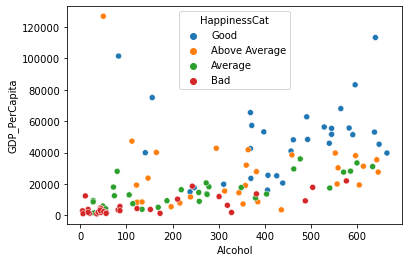

In [88]:
sns.scatterplot(inp1.Alcohol, inp1.GDP_PerCapita,hue= inp1.HappinessCat)

Here we can see, Mostly unhappy countries are low on GDP as well as alcohol consumption.

And happiest countries lies from 300-600L per capita Alcohol consumption

In [89]:
inp1[ inp1.GDP_PerCapita > 120000].Country

32    Qatar
Name: Country, dtype: object

Qatar has 120000+ GDP per capita and Above Average happiness index but are very low in alcohol consumption

### Alcohol consumption Vs HDI Vs HappinessCat

<AxesSubplot:xlabel='Alcohol', ylabel='HDI'>

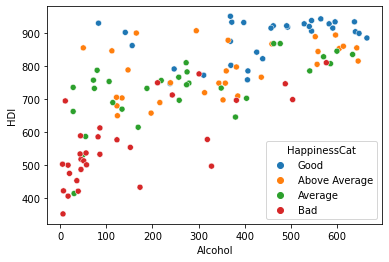

In [61]:
sns.scatterplot(inp1.Alcohol, inp1.HDI,hue= inp1.HappinessCat)

Here we can see mostly Low HDI countries are consuming less alcohol and are also low in happiness index.

But we can't neglect there are a few countries which have high alcohol consumption but are still in sad category.

In [66]:
inp1[(inp1.HappinessCat == "Bad") & (inp1.Alcohol > 300)].Country

92     South Africa
96          Ukraine
99          Georgia
102        Bulgaria
105           Gabon
107           Haiti
112          Angola
Name: Country, dtype: object

These are the countries whose alcohol consumption is more than average but are still in sad category

In [82]:
print(f"\naverage HDI= {inp1.HDI.mean()}")
print(f"average GDP per capita= {inp1.GDP_PerCapita.mean()}")
inp1[(inp1.HappinessCat == "Bad") & (inp1.Alcohol > 300)][["Country", "HDI","GDP_PerCapita"]]


average HDI= 740.8770491803278
average GDP per capita= 24430.95275328525


,Country,HDI,GDP_PerCapita
92,South Africa,696,13686.882360
96,Ukraine,746,9249.462135
99,Georgia,776,12004.573830
102,Bulgaria,810,21960.369940
105,Gabon,698,17875.761150
107,Haiti,496,1866.617589
112,Angola,577,6452.355165


We can see all these countries have near average HDI but their GDP per capita is far less than average

Maybe that pushes them closer to unhappiness

### What drinks happy countries drink?

In [102]:
inp2= inp1[(inp1.HappinessCat == "Good") & (inp1.Alcohol > 300)]\
[["Country","HappinessScore", "Beer_PerCapita","Spirit_PerCapita","Wine_PerCapita", "Alcohol"]]\
.head(10).sort_values(by=['HappinessScore'],ascending=False)
inp2

,Country,HappinessScore,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Alcohol
0,Denmark,7.526,224,81,278,583
1,Switzerland,7.509,185,100,280,565
2,Iceland,7.501,233,61,78,372
3,Norway,7.498,169,71,129,369
4,Finland,7.413,263,133,97,493
5,Canada,7.404,240,122,100,462
6,Netherlands,7.339,251,88,190,529
7,New Zealand,7.334,203,79,175,457
8,Australia,7.313,261,72,212,545
9,Sweden,7.291,152,60,186,398


### What is the GDP and HDI of happiest countries

In [106]:
inp1[(inp1.HappinessCat == "Good")]\
[["Country","HDI", "GDP_PerCapita","HappinessScore"]]\
.head(10).sort_values(by=['HappinessScore'],ascending=False).corr()

,HDI,GDP_PerCapita,HappinessScore
HDI,1.000000,0.875920,0.377822
GDP_PerCapita,0.875920,1.000000,0.615369
HappinessScore,0.377822,0.615369,1.000000
